<a href="https://colab.research.google.com/github/Jorge2018/DataScience2022-2/blob/main/Script_ultimoMatplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
df=pd.read_csv(r'https://raw.githubusercontent.com/Jorge2018/DataScience2022-2/main/england-premier-league-matches-2018-to-2019-stats.csv')
print('---------------------------')
print('la cantidad de filas y columnas del df son (fil,col):', df.shape)
print('---------------------------')
print('los tipos de dato del df son:\n', df.dtypes)
print('---------------------------')
print('La cantidad de registros al comenzar es:\n',df.count())
print('---------------------------')

---------------------------
la cantidad de filas y columnas del df son (fil,col): (380, 64)
---------------------------
los tipos de dato del df son:
 timestamp           int64
date_GMT           object
status             object
attendance          int64
home_team_name     object
                   ...   
odds_ft_over35    float64
odds_ft_over45    float64
odds_btts_yes     float64
odds_btts_no      float64
stadium_name       object
Length: 64, dtype: object
---------------------------
La cantidad de registros al comenzar es:
 timestamp         380
date_GMT          380
status            380
attendance        380
home_team_name    380
                 ... 
odds_ft_over35    380
odds_ft_over45    380
odds_btts_yes     380
odds_btts_no      380
stadium_name      380
Length: 64, dtype: int64
---------------------------


In [148]:
df.duplicated()
df = df.drop_duplicates()
print('la cantidad de registros sin duplicados es:\n',df.count())
print('---------------------------')
print('los datos faltantes del df son:\n',df.isna().sum())
print('---------------------------')

la cantidad de registros sin duplicados es:
 timestamp         380
date_GMT          380
status            380
attendance        380
home_team_name    380
                 ... 
odds_ft_over35    380
odds_ft_over45    380
odds_btts_yes     380
odds_btts_no      380
stadium_name      380
Length: 64, dtype: int64
---------------------------
los datos faltantes del df son:
 timestamp         0
date_GMT          0
status            0
attendance        0
home_team_name    0
                 ..
odds_ft_over35    0
odds_ft_over45    0
odds_btts_yes     0
odds_btts_no      0
stadium_name      0
Length: 64, dtype: int64
---------------------------


In [156]:
varInt = df.select_dtypes(include=['float64', 'int64'])
for i in varInt:
  print('el valor minimo de la columna',i,'es:',df[i].min(),', el valor maximo de la columna',i,'es:',df[i].max(),',la mediana de la columna',i,'es:',df[i].mean())
  print('______________________________________________________________________________________________________________-')

el valor minimo de la columna timestamp es: 1533927600 , el valor maximo de la columna timestamp es: 1557669600 ,la mediana de la columna timestamp es: 1546144953.9473684
______________________________________________________________________________________________________________-
el valor minimo de la columna attendance es: 9980 , el valor maximo de la columna attendance es: 81332 ,la mediana de la columna attendance es: 38186.847368421055
______________________________________________________________________________________________________________-
el valor minimo de la columna Game Week es: 1 , el valor maximo de la columna Game Week es: 38 ,la mediana de la columna Game Week es: 19.5
______________________________________________________________________________________________________________-
el valor minimo de la columna Pre-Match PPG (Home) es: 0.0 , el valor maximo de la columna Pre-Match PPG (Home) es: 3.0 ,la mediana de la columna Pre-Match PPG (Home) es: 1.4808947368421053


Text(18392.368243531568, 91.66499999999999, 'el std es: 16720')

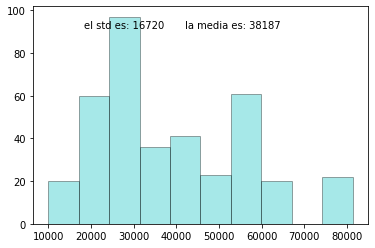

In [269]:
plt.hist(df['attendance'], bins=10, color='c', edgecolor='k', alpha=0.35)
min_ylim, max_ylim = plt.ylim()
plt.text(df['attendance'].mean()*1.1, max_ylim*0.9, 'la media es: {:.0f}'.format(df['attendance'].mean()))
plt.text(df['attendance'].std()*1.1, max_ylim*0.9, 'el std es: {:.0f}'.format(df['attendance'].std()))


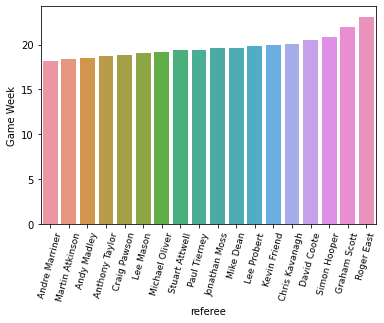

In [312]:
df0=df.groupby(['referee']).mean()     # Agrupa df por cols 'Item_Type','Item_Fat_Content' obteniendo el prom de las demas cols
dicc=df0[['Game Week']].to_dict()
df00=pd.DataFrame.from_dict(dicc)
df00['referee']=df00.index
plt.xticks(rotation=75,fontsize=9)
sns.barplot(x='referee', y="Game Week", data=df00,order=df00.sort_values('Game Week').referee)

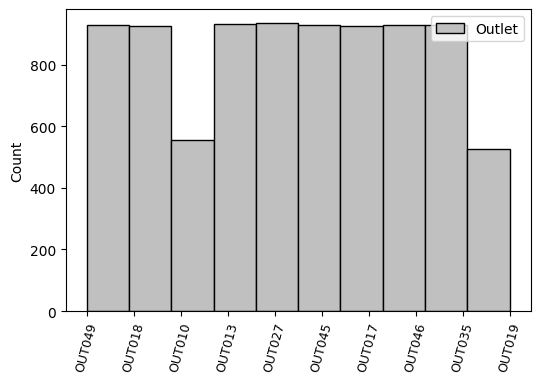

distribucion de los distintos identificadores de Outlets analizados


In [142]:
x =df['Outlet_Identifier']                                #Asignacion de valores para el eje x
num_bins = len(df['Outlet_Identifier'].unique())          #Cantidad de cols segun la cantidad de registros unicos de la col 'Item_Type'
etiqueta=['Outlet']                                       #Asignacion de valores para la etiqueta
fig1 = plt.figure(dpi=100)                                #Tamaño del grafo
ax1 = fig1.add_subplot(1,1,1)                             #Asignacion a la variable ax1 de la figura del grafico
ax1.hist(x, num_bins,color='silver',edgecolor = "black")  #Creacion de grafo del tipo histograma, considera color de fondo (color) y del borde de linea (edgecolor)
ax1.set_ylabel("Count")                                   #leyenda del eje y
ax1.legend(etiqueta)                                      #leyenda de la etiqueta
plt.xticks(rotation=75,fontsize=9)                        #rotacion y fuente de la leyenda del eje x
plt.show()                                                #muestra el grafo
print('distribucion de los distintos identificadores de Outlets analizados')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


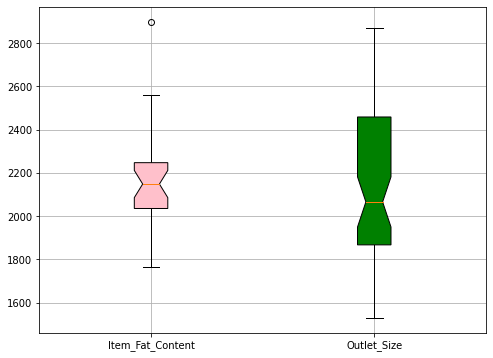

resumen estadistico entre promedio de valores (Item_Outlet_Sales) de las cols Item_Fat_Content,Outlet_Size


In [143]:
df0=df.groupby(['Item_Type','Item_Fat_Content']).mean()     # Agrupa df por cols 'Item_Type','Item_Fat_Content' obteniendo el prom de las demas cols
x=df0['Item_Outlet_Sales'].to_list()                        # Selecciona la cols 'Item_Outlet_Sales' del df0 y lo convierte en list
df1=df.groupby(['Item_Type','Outlet_Size']).mean()          # Agrupa df por cols 'Item_Type','Outlet_Size' obteniendo el prom de las demas cols
y=df1['Item_Outlet_Sales'].to_list()                        # Selecciona la cols 'Item_Outlet_Sales' del df1 y lo convierte en list
data=x,y                                                    # Asigna los valores de x e y a la tupla data
labels = ['Item_Fat_Content','Outlet_Size']                 # Asigna valores de las etiquetas

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8, 6))   # Crea grafo con dimensiones 1x1 (fil,col) y tamaño 8,6
bplot = axes.boxplot(data,                                  # Crea las cajas con los datos de la tupla data, notch=True indica caja con muescas
                         notch=True,                        # Indica orientacion de las cajas creadas en este caso vertical (vert=True)
                         vert=True,                         # patch_artist=True indica que utilizara esta libreria para darle el diseño a las cajas
                         patch_artist=True,                 # Asigna los valores de label a las etiquetas de las cajas labels=labels
                         labels=labels)

colors = ['pink', 'green']                                  #Lista de colores a utilizar en las cajas
for bplotA in (bplot,bplot):                                #ciclo recorre el grafico para colorear fondos de las cajas segun lista colors
    for patch, color in zip(bplotA['boxes'], colors):
        patch.set_facecolor(color)
plt.grid()                                                  # dibuja grilla sobre el grafo
plt.show()                                                  # muestra el grafo
print('resumen estadistico entre promedio de valores (Item_Outlet_Sales) de las cols Item_Fat_Content,Outlet_Size')


Mapa de calor del promedio de ventas anuales (Item_Outlet_Sales) y la correlacion entre las columnas Tipo Producto (Item_Type) y el año en que se establecio el comercio (Outlet_Establishment_Year)



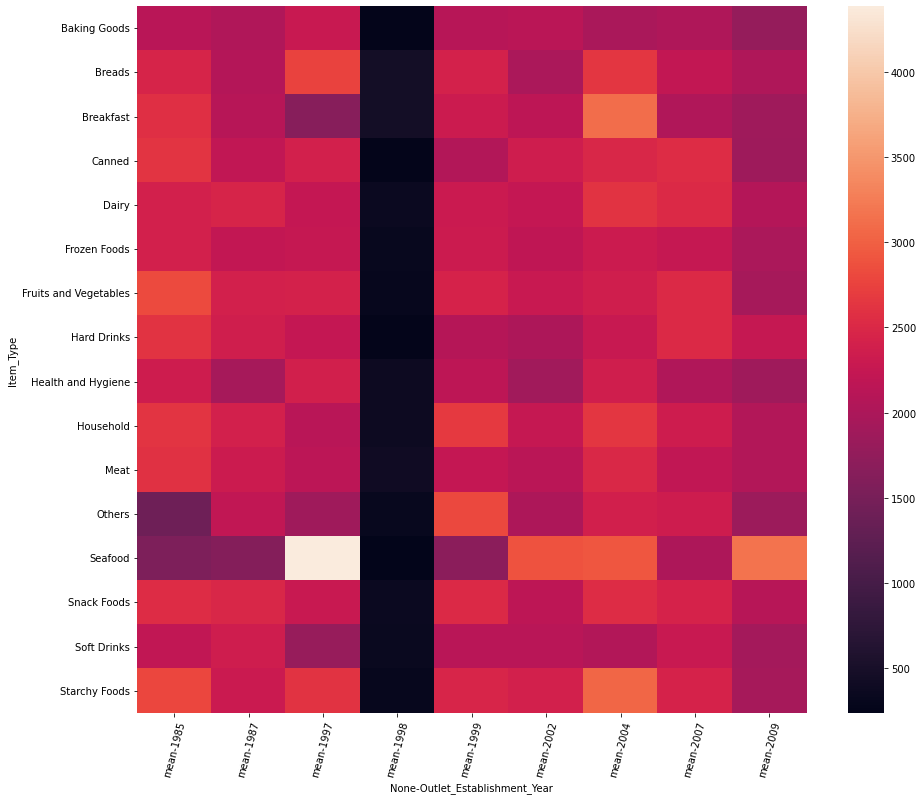

In [144]:
pivot=pd.pivot_table(df,values='Item_Outlet_Sales',index='Item_Type',columns='Outlet_Establishment_Year', aggfunc=[np.mean]) #Crea df pivot y promedio de sus valores (Item_Outlet_Sales)
figura=plt.figure(figsize=(15,13))  #Crea grafo e indica tamaño de este
plt.xticks(rotation=75,fontsize=10) #Indica rotacion y tamaño de fuente de la leyenda del eje x
ax = sns.heatmap(pivot);            #muestra grafo
print('Mapa de calor del promedio de ventas anuales (Item_Outlet_Sales) y la correlacion entre las columnas Tipo Producto (Item_Type) y el año en que se establecio el comercio (Outlet_Establishment_Year)\n')

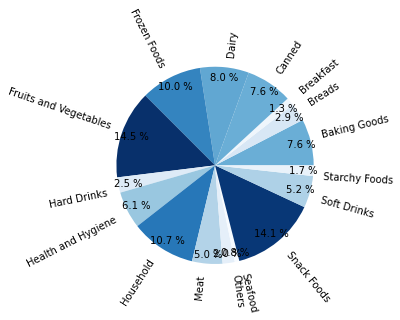

<Figure size 1656x1656 with 0 Axes>

el grafico muestra el porcentaje de productos segun su existencia en el df


In [145]:
from matplotlib import cm
from matplotlib import colors
df1=df.groupby(['Item_Type']).count() # Agrupa y cuenta todo el df por la col 'Item_Type'
df2=df1['Item_Identifier'].to_dict()  # convierte a dicc los valores de la col 'Item_Identifier'
etiquetas=list(df2.keys())            # convierte en lista las keys del dicc recien creado
valores=list(df2.values())            # convierte en lista los valores del dicc recien creado


normdata = colors.Normalize(min(valores), max(valores)) # variable que utiliza la libreria Normalize (selecciona min y max de la lista valores)
colormap = cm.get_cmap("Blues")                         # variable que utiliza la libreria LinearSegmentedColormap
colores =colormap(normdata(valores))                    # variable del tipo arreglo que usa ambas variables recien creadas (normdata y colormap)

plt.pie(valores, labels=etiquetas, autopct="%0.1f %%", colors=colores,textprops={'fontsize': 10},rotatelabels =True,pctdistance=0.9)
#se identifican los siguientes valores
#valores -> lista con valores del tipo int tomadas del df principal ([Item_type].count)
#labels=etiquetas -> lista con valores del tipo str tomadas del df principal ([Item_Identifier])
#autopct="%0.1f %%"-> cantidad de decimales a utilizar
#colors=colores -> colores a utilizar
#textprops={'fontsize': 10} -> tamaño de la fuente a utilizar en los labels
#rotatelabels =True -> propiedad que se activa (True) para cambiar la direccion del texto del label
#pctdistance=0.9 -> propiedad ajustable que permite "acercar" o "alejar" los num o porcentajes mostrados del centro del grafo

plt.axis("equal") #asegura proporcion igualitaria, vale decir, suma de porcentajes 100% (círculo)
plt.figure(figsize=(23,23)) #tamaño del grafo
plt.show() #muestra el grafico recien creado
print('el grafico muestra el porcentaje de productos segun su existencia en el df')

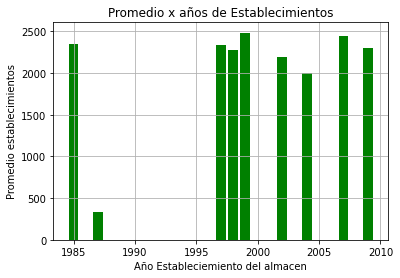

El grafico muestra el promedio de comercios establecidos durante el rango de años mencionado


In [146]:
df1=df.groupby(['Outlet_Establishment_Year']).mean() # Agrupa y obtiene el prom de todo el df por la col 'Outlet_Establishment_Year'
x=df1['Item_Outlet_Sales'].to_list()                 # convierte a list los valores de la col 'Item_Identifier'
y=df['Outlet_Establishment_Year'].unique()           # identifica los valores unicos de la col 'Outlet_Establishment_Year' del df
_x = y                                               # asignamos los valores para el eje x
_y = x                                               # asignamos los valores para el eje y
plt.bar(_x, _y, color="green")                       # creacion del grafo y asignacion de color de las barras
plt.ylabel('Promedio establecimientos')              # leyenda del eje y
plt.xlabel('Año Estableciemiento del almacen')       # leyenda del eje x
plt.title('Promedio x años de Establecimientos')     # leyenda del titulo
plt.grid()                                           # dibuja grilla sobre el grafo
plt.show()                                           # presentacion del grafo
print('El grafico muestra el promedio de comercios establecidos durante el rango de años mencionado')